In [8]:
import joblib

In [9]:
import pandas as pd

# Load the dataset
file_path = 'Final Data Set.xlsx'
original_data = pd.read_excel(file_path)

In [10]:
#choosing the relevant columns
original_data.columns = original_data.iloc[0]
original_data = original_data.drop(0)
original_data.reset_index(drop=True, inplace=True)

# Relevant Columns
relevant_columns_adjusted = [
    "Father's Education", "Mother's Education", "Parental Income",
    "Number of immediate family members",
    "Any close family member with the same profession available for guidance",
    "Availing any scholarship", "Basic Education Stream", "Intermediate Stream",
    "Matric percentage", "Intermediate percentage",
    "SGPA in BS First semester", "SGPA in BS Second semester",
    "SGPA in BS Third semester", "SGPA in BS Fourth semester", "ID No.",
    "I opted for this program of study because of my own interest.",
    "SGPA in BS Fifth semester", "CGPA in BS Fifth semester"
]

In [11]:
# Filtering the dataset for relevant columns
filtered_data = original_data[relevant_columns_adjusted]

numerical_cols = ["Matric percentage","Number of immediate family members",
                  "Intermediate percentage",
                  "SGPA in BS First semester", "SGPA in BS Second semester",
                  "SGPA in BS Third semester", "SGPA in BS Fourth semester",
                  "SGPA in BS Fifth semester", "CGPA in BS Fifth semester"]

In [12]:
# Filling missing values for numerical columns with median
for col in numerical_cols:
    # Converting to numeric
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')
    filtered_data[col].fillna(filtered_data[col].median(), inplace=True)

categorical_cols = [col for col in relevant_columns_adjusted if col not in numerical_cols]

# Encoding categorical columns - using label encoding
for col in categorical_cols:
    filtered_data[col] = pd.factorize(filtered_data[col])[0]



C:\Users\Muhammad Rafay\AppData\Local\Temp\ipykernel_11584\3007166192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')
C:\Users\Muhammad Rafay\AppData\Local\Temp\ipykernel_11584\3007166192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[col].fillna(filtered_data[col].median(), inplace=True)
C:\Users\Muhammad Rafay\AppData\Local\Temp\ipykernel_11584\3007166192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [13]:
#EDA

#Importing libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

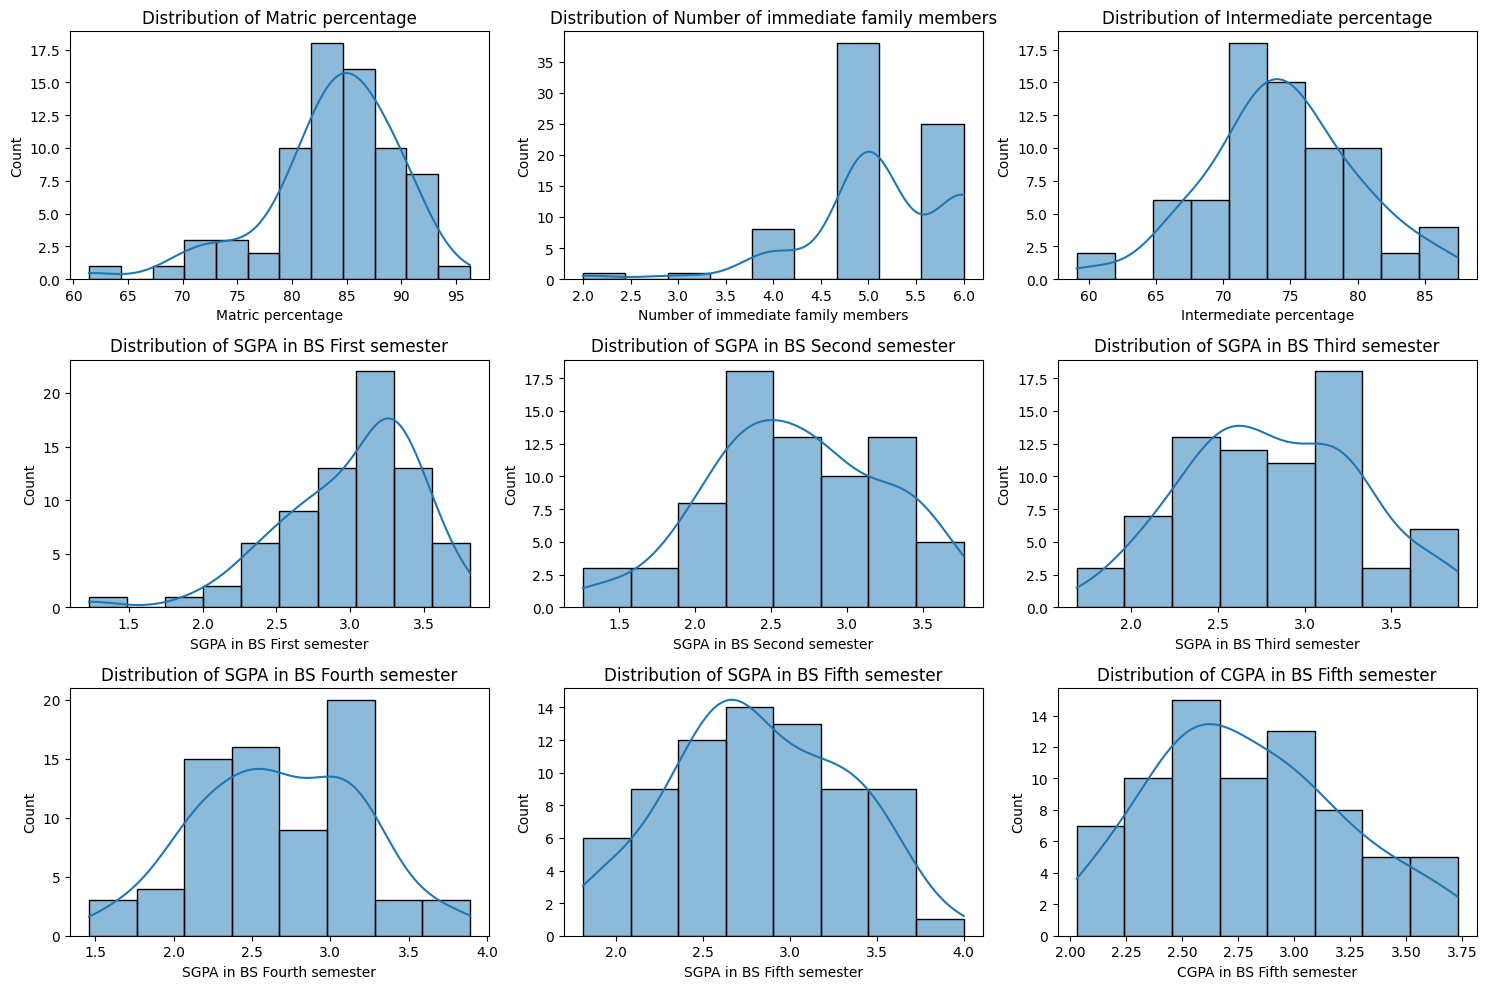

In [14]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(filtered_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

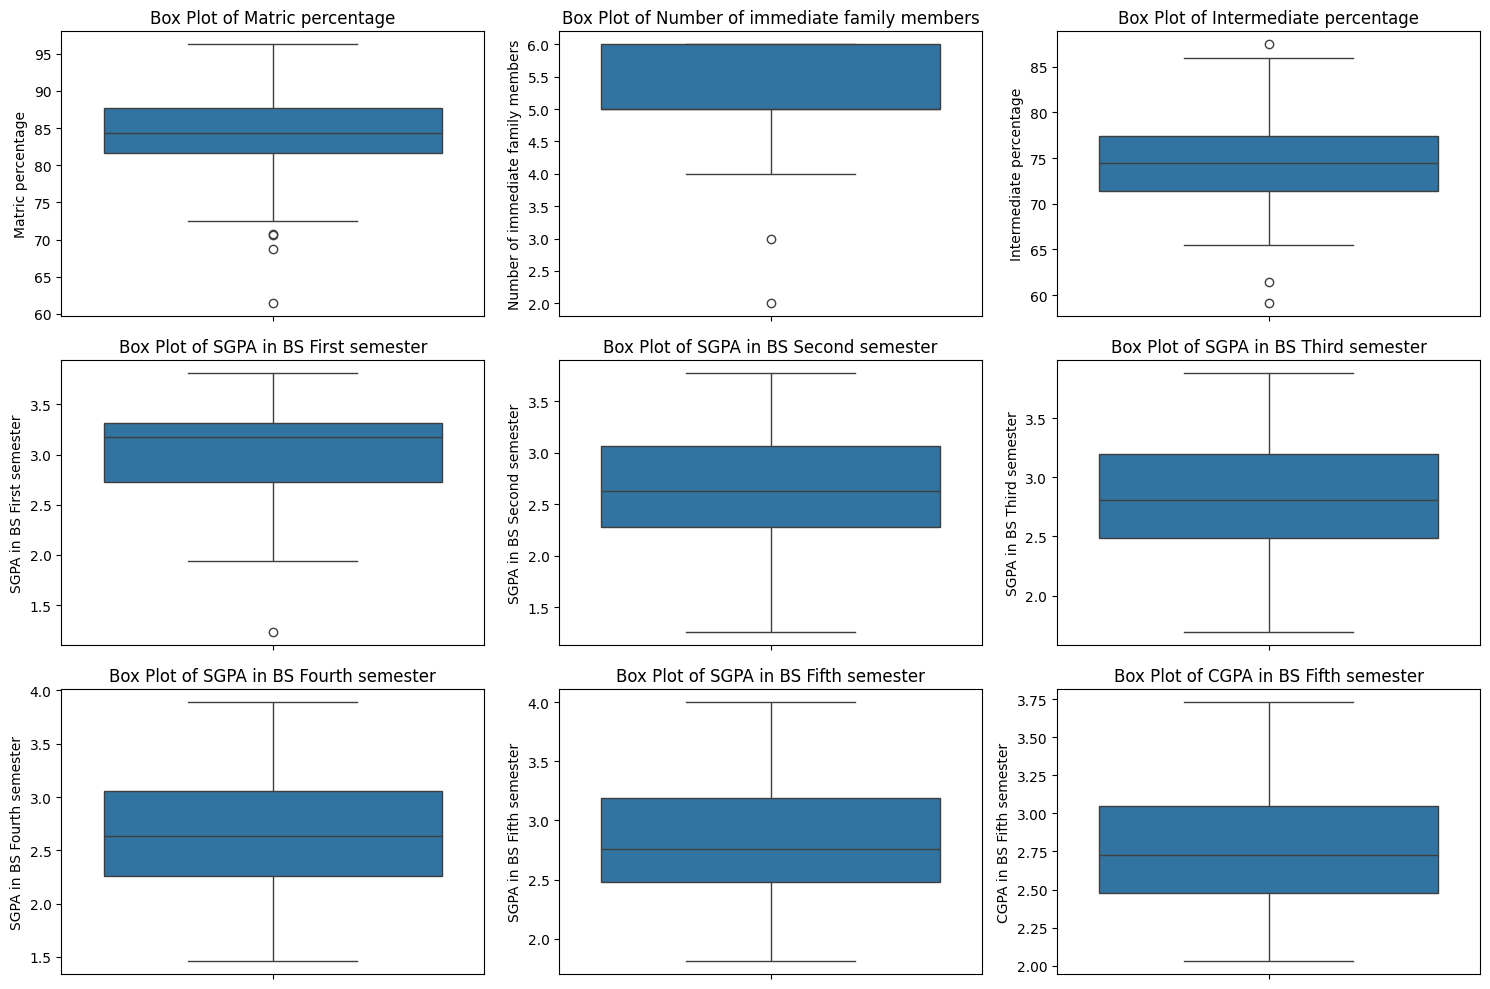

In [15]:
# Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=filtered_data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

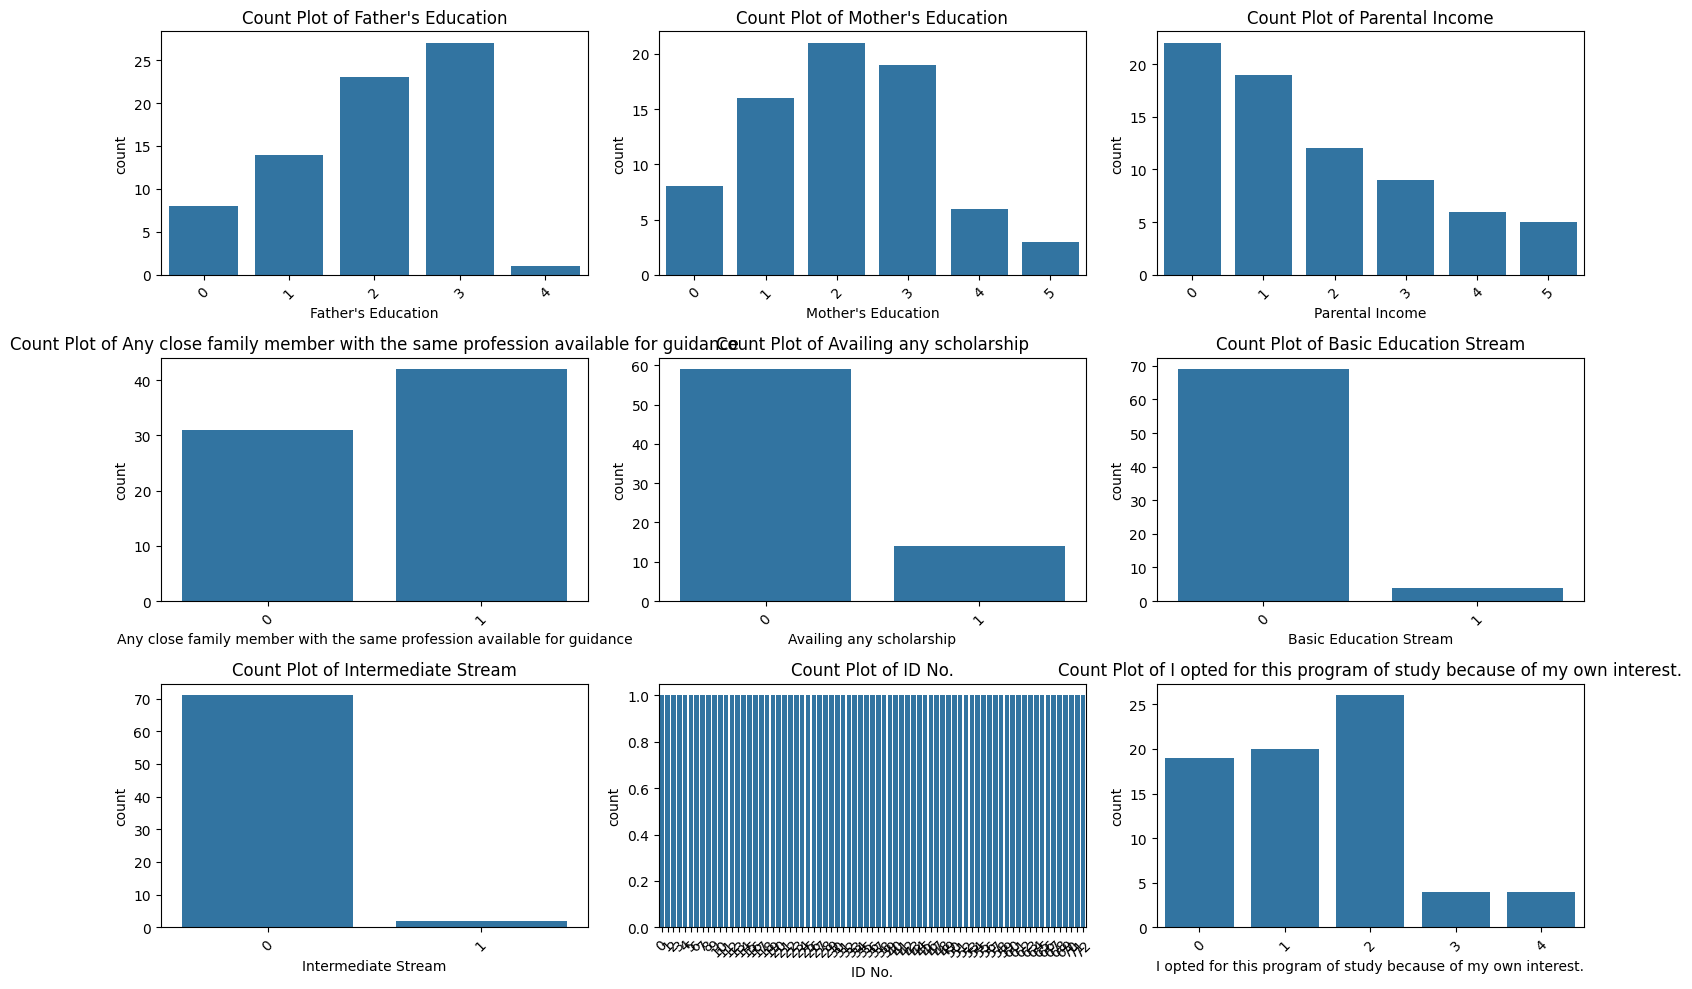

In [16]:
# Count Plots for Categorical Features
categorical_cols = [col for col in filtered_data.columns if col not in numerical_cols]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=filtered_data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

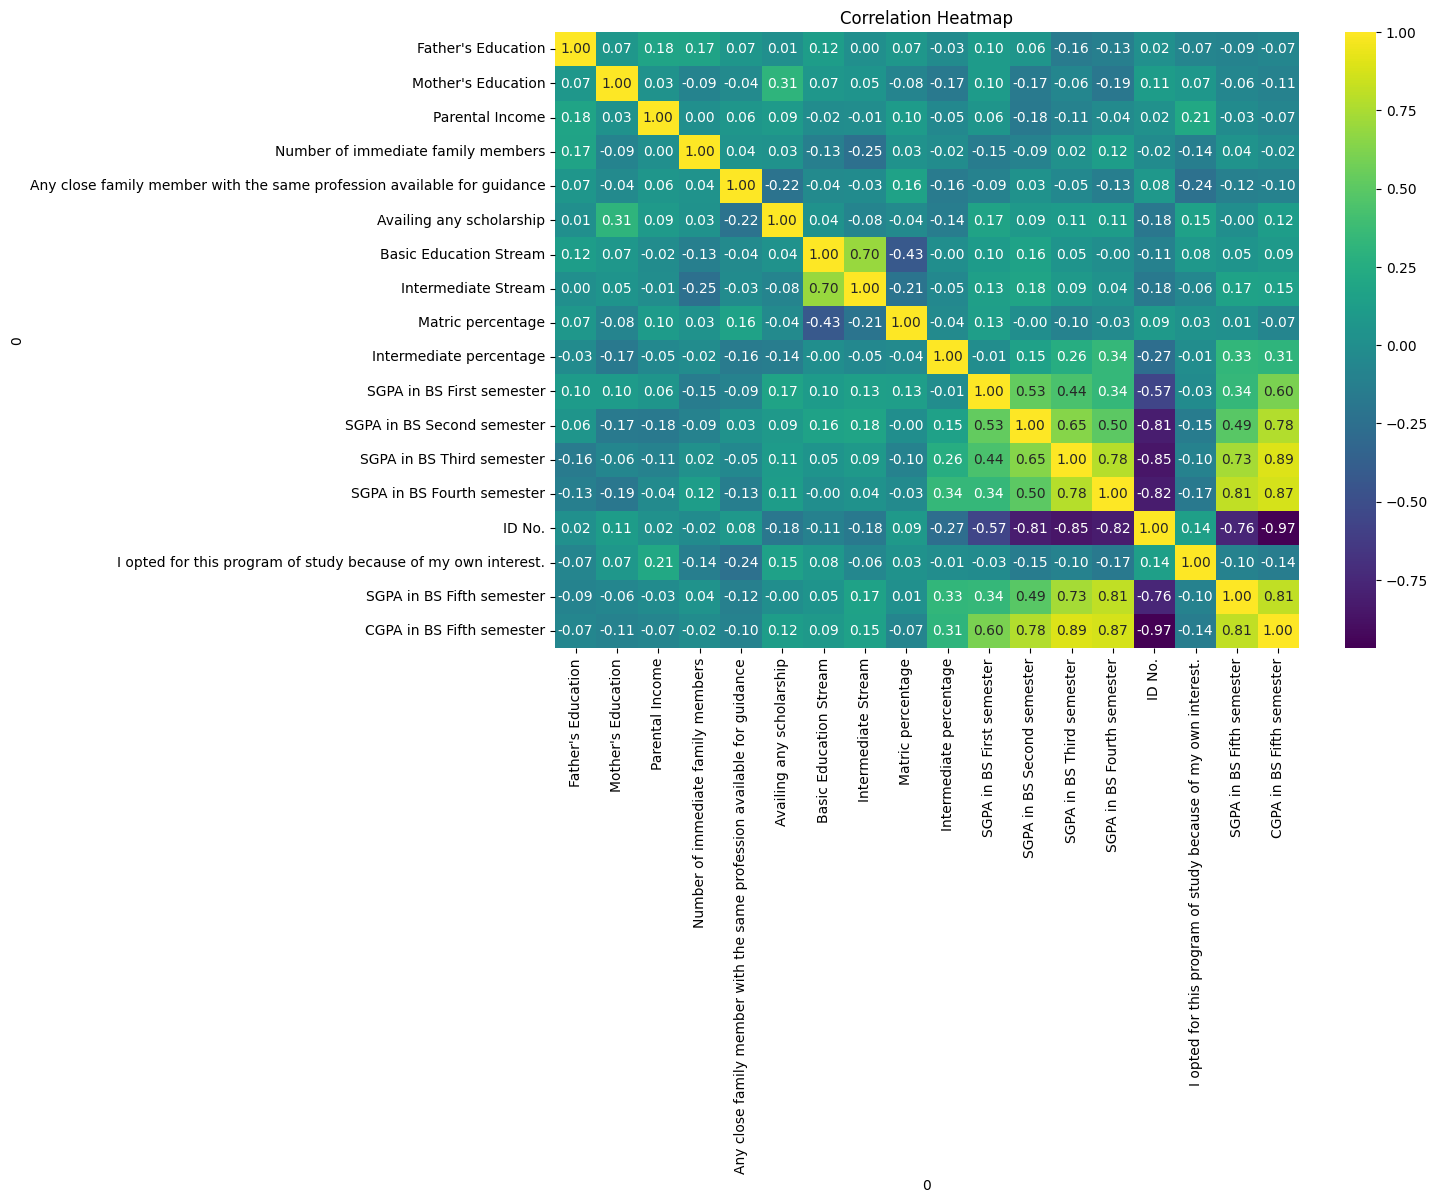

In [17]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Model selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [19]:
#splitting data in 70 30 and adding the target variables
from sklearn.model_selection import train_test_split
X = filtered_data.drop(['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'], axis=1)
y = filtered_data[['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
import numpy as np

In [21]:
#Evaluation metrics for the checking of the predictions
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [31]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print("Linear Regression")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

# Save the model to a file
model_filename = 'Linear_Regression.joblib'
joblib.dump(model, model_filename)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1709
- Mean Squared Error: 0.0292
- Mean Absolute Error: 0.1152
- R2 Score: 0.8648
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2572
- Mean Squared Error: 0.0661
- Mean Absolute Error: 0.1715
- R2 Score: 0.7761


['Linear_Regression.joblib']

In [30]:
# Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print("Lasso Regression")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

# Save the model to a file
model_filename = 'Lasso.joblib'
joblib.dump(lasso_model, model_filename)

Lasso Regression
Model performance for Training set
- Root Mean Squared Error: 0.2325
- Mean Squared Error: 0.0540
- Mean Absolute Error: 0.1619
- R2 Score: 0.7474

Model performance for Test set
- Root Mean Squared Error: 0.2785
- Mean Squared Error: 0.0776
- Mean Absolute Error: 0.1763
- R2 Score: 0.7199


['Lasso.joblib']

In [29]:
# K-Neighbors Regressor Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print("K-Neighbors Regressor")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

# Save the model to a file
model_filename = 'K-Neighbors.joblib'
joblib.dump(knn_model, model_filename)

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1869
- Mean Squared Error: 0.0349
- Mean Absolute Error: 0.1250
- R2 Score: 0.8383

Model performance for Test set
- Root Mean Squared Error: 0.2728
- Mean Squared Error: 0.0744
- Mean Absolute Error: 0.1713
- R2 Score: 0.7386


['K-Neighbors.joblib']

In [28]:
# Decision Tree Regressor Model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

print("Decision Tree Regressor")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

# Save the model to a file
model_filename = 'DecisionTreeModel.joblib'
joblib.dump(decision_tree_model, model_filename)

Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000

Model performance for Test set
- Root Mean Squared Error: 0.2676
- Mean Squared Error: 0.0716
- Mean Absolute Error: 0.2045
- R2 Score: 0.7453


['DecisionTreeModel.joblib']

In [27]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = filtered_data.drop(['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester'], axis=1)
y = filtered_data[['SGPA in BS Fifth semester', 'CGPA in BS Fifth semester']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor Model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


print("Random Forest Regressor")
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Squared Error: {:.4f}".format(model_train_mse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('')
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Squared Error: {:.4f}".format(model_test_mse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))


# Save the model to a file
model_filename = 'RandomForestRegressor.joblib'
joblib.dump(random_forest_model, model_filename)




Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0925
- Mean Squared Error: 0.0086
- Mean Absolute Error: 0.0643
- R2 Score: 0.9599

Model performance for Test set
- Root Mean Squared Error: 0.2103
- Mean Squared Error: 0.0442
- Mean Absolute Error: 0.1398
- R2 Score: 0.8488


['RandomForestRegressor.joblib']

In [ ]:
# As Random forest regressor was the best performing model we selected it for the further deployement of Gui